# ADB - Minggu5 - Analisis Data Kelahiran Bayi

# Preprocessing Data
Preprocessing data sebelum dimasukkan ke training model dapat dilakukan melalui tahap berikut.
1. Descriptive Analytic<br>
Tahap memahami data yang didalamnya akan terjadi penemuan missing data, duplicate data dan anomaly data.
2. Identifying North Star<br>
Menentukan tujuan utama analisis dan parameter keberhasilan dari model.
3. Exploratory Analytic<br>
Penentuan fitur2 tambahan sebelum dimasukkan ke model.
4. Predictive Analytic<br>
Penentuan model beserta hyperparameternya.


In [ ]:
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **1. DESCRIPTIVE ANALYTIC**

Tahap pemahaman dan pembersihan data

1. Load Data
2. Pendefinisian Datatype
3. Data Numerik      : Describe & Histogram
4. Data Kategorikal : Unique Value & Barplot
5. Data Cleaning

#### 1.1. Load Data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df_raw = pd.read_csv('data.csv')

In [ ]:
uploaded = files.upload()

Saving penjelasan_data.txt to penjelasan_data.txt


In [ ]:
with open('penjelasan_data.txt','r') as f:
    info = f.readlines();

In [ ]:
info

['Data ini akan digunakan untuk melakukan penelitian terkait hubungan kelahiran seorang bayi \n',
 'dan kondisi dari ibu yang mengandung (i.e., kebiasaan, perilaku, dan demografi). \n',
 '\n',
 'Dataset variables:\n',
 "fage           � father's age in years.\n",
 "mage           � mother's age in years.\n",
 'mature         � maturity status of mother.\n',
 'weeks          � length of pregnancy in weeks.\n',
 'premie         � whether the birth was classied as premature (premie) or full-term.\n',
 'visits         � number of hospital visits during pregnancy.\n',
 'gained         � weight gained by mother during pregnancy in pounds.\n',
 'weight         � weight of the baby at birth in pounds.\n',
 'lowbirthweight � whether baby was classied as low birthweight (low) or not (not low).\n',
 'gender         � gender of the baby, female or male.\n',
 'habit          � status of the mother as a nonsmoker or a smoker.\n',
 'marital        � whether mother is married or not married at birth.\

In [ ]:
df_raw.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


### 1.2. Pendefinisian Datatype
**Kolom dalam dataset harus didefinisikan kedalam 3 type : numerik, kategorical, boolean**<br>
Cek adanya kemungkinan kolom numerik yang sebenarnya adalah kategorikal<br>
*Contoh : kolom `zip1`*<br><br>

---
<i><h6>Definisi tipe data wajib dilakukan untuk menjawab pemahaman analist terhadap konstrain data dan menghindari kesalahan asumsi awal (perlakuan numerik dilakukan ke data kategori).
---



In [ ]:
df_raw.dtypes

fage              float64
mage                int64
mature             object
weeks             float64
premie             object
visits            float64
marital            object
gained            float64
weight            float64
lowbirthweight     object
gender             object
habit              object
whitemom           object
dtype: object

In [ ]:
df_raw.select_dtypes(exclude='object').head(5)

,fage,mage,weeks,visits,gained,weight
0,NaN,13,39.0,10.0,38.0,7.63
1,NaN,14,42.0,15.0,20.0,7.88
2,19.0,15,37.0,11.0,38.0,6.63
3,21.0,15,41.0,6.0,34.0,8.00
4,NaN,15,39.0,9.0,27.0,6.38


In [ ]:
## Check Hidden Category
check_category = {"nama":[],"min":[],"max":[],"selisih":[],"nunique":[]}
list_check = df_raw.select_dtypes(exclude='object').columns

for i in list_check:
    check_category["nama"].append(df_raw[i].name)
    check_category["min"].append(df_raw[i].min())
    check_category["max"].append(df_raw[i].max())
    check_category["selisih"].append(df_raw[i].max()-df_raw[i].min())
    check_category["nunique"].append(df_raw[i].nunique())

pd.DataFrame(check_category)

,nama,min,max,selisih,nunique
0,fage,14.0,55.00,41.00,37
1,mage,13.0,50.00,37.00,33
2,weeks,20.0,45.00,25.00,23
3,visits,0.0,30.00,30.00,26
4,gained,0.0,85.00,85.00,71
5,weight,1.0,11.75,10.75,126


**Asumsi : kolom kategori memiliki ununique = (selisih+1)**
<br>`field1` memiliki ununique = (selisih+1), jadi dianggap sebagai kategorikal
<br>`field2` memiliki nunique = 2, jadi dianggap sebagai boolean
<br>`field5` memiliki selisih > nuniquenya, jadi tidak dianggap sebagai kategorikal
<br>
<br> kolom `fage`,`mage`, dan `weeks` dapat menjadi kategorikal jika dilakukan binning (kategori per range umur).


<br>Maka kolom-kolom yang dianggap kategori adalah.
1. `fage`
2. `mage`
3. `weeks`
4. `visits`
5. `gained`
6. `weight`

<br>kolom-kolom yang dianggap numerikal adalah.
1. `mature`
2. `premie`
3. `lowbirthweight`
4. `gender`
5. `habit`
6. `whitemom`

<br>sisa kolom dianggap boolean

In [ ]:
kolom_numerik = df_raw.select_dtypes(exclude='object').columns.to_list()
df_raw_numerik = df_raw[kolom_numerik]
df_raw_numerik.head()

,fage,mage,weeks,visits,gained,weight
0,NaN,13,39.0,10.0,38.0,7.63
1,NaN,14,42.0,15.0,20.0,7.88
2,19.0,15,37.0,11.0,38.0,6.63
3,21.0,15,41.0,6.0,34.0,8.00
4,NaN,15,39.0,9.0,27.0,6.38


In [ ]:
kolom_kategorikal = df_raw.select_dtypes(include='object').columns.to_list()
df_raw_kategorikal = df_raw[kolom_kategorikal]
df_raw_kategorikal = df_raw_kategorikal.astype(str)
df_raw_kategorikal.head()

,mature,premie,marital,lowbirthweight,gender,habit,whitemom
0,younger mom,full term,married,not low,male,nonsmoker,not white
1,younger mom,full term,married,not low,male,nonsmoker,not white
2,younger mom,full term,married,not low,female,nonsmoker,white
3,younger mom,full term,married,not low,male,nonsmoker,white
4,younger mom,full term,married,not low,female,nonsmoker,not white


### 1.3. Data Numerik  : Describe & Histogram
##### **Melihat gambaran awal pada Data Numerik**<br>




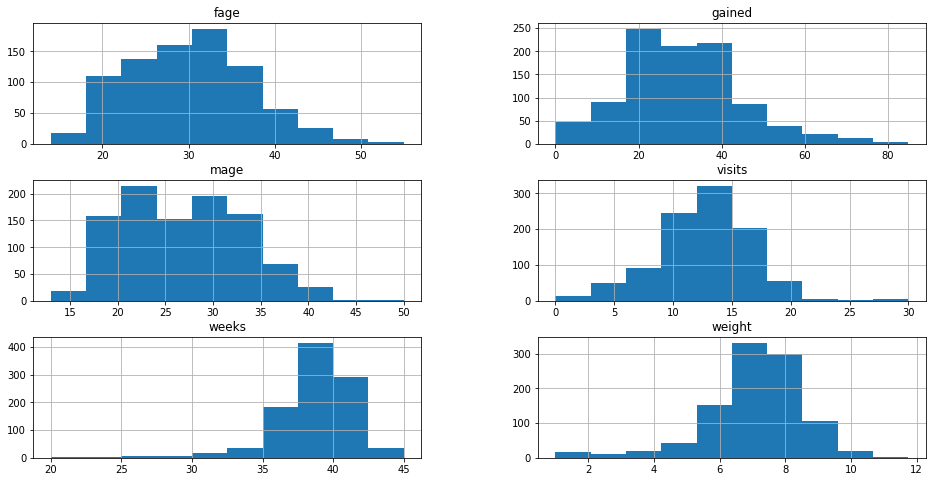

In [ ]:
A = df_raw_numerik.hist(figsize=[16,8])

In [ ]:
df_raw_numerik.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


### 1.4. Data Kategorikal : Unique Value & Barplot
##### **Melihat gambaran awal pada Data Numerik**<br>




In [ ]:
df_raw_kategorikal.head()

,mature,premie,marital,lowbirthweight,gender,habit,whitemom
0,younger mom,full term,married,not low,male,nonsmoker,not white
1,younger mom,full term,married,not low,male,nonsmoker,not white
2,younger mom,full term,married,not low,female,nonsmoker,white
3,younger mom,full term,married,not low,male,nonsmoker,white
4,younger mom,full term,married,not low,female,nonsmoker,not white


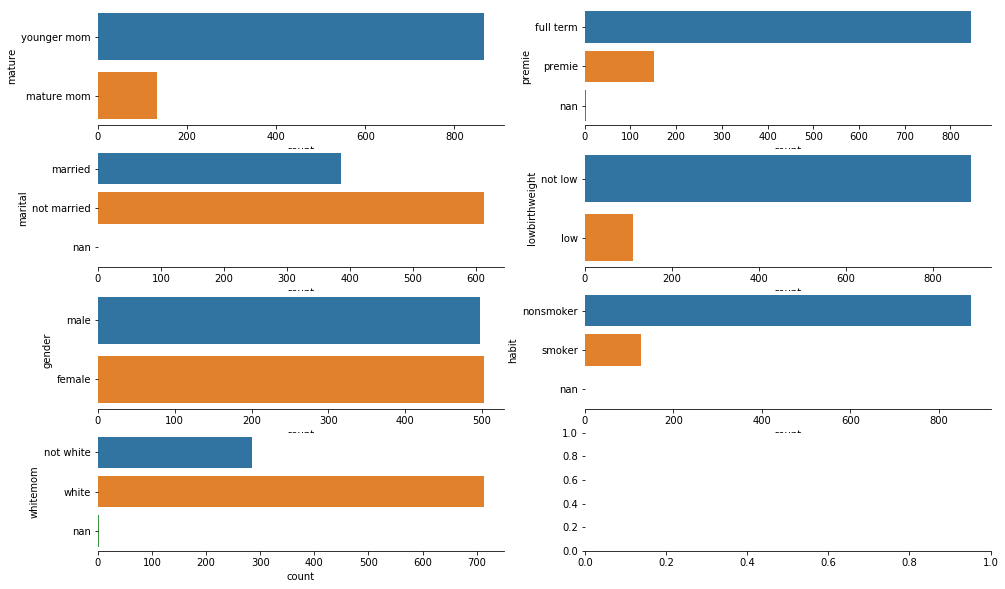

In [ ]:

n_fig = np.ceil(len(kolom_kategorikal)/2).astype(int)

f, axes = plt.subplots(n_fig, 2, figsize=(16, 10), sharex=False)
sns.despine(left=True)

for i,col in enumerate(kolom_kategorikal):
    ax_x = np.floor(i/2).astype(int)
    ax_y = i%2
    sns.countplot(y=col,data=df_raw_kategorikal, ax=axes[ax_x, ax_y])

plt.show()



In [ ]:
df_raw_kategorikal.describe(include=['object'])

,mature,premie,marital,lowbirthweight,gender,habit,whitemom
count,1000,1000,1000,1000,1000,1000,1000
unique,2,3,3,2,2,3,3
top,younger mom,full term,not married,not low,female,nonsmoker,white
freq,867,846,613,889,503,873,714


## 1.5 Data Cleaning
**Data cleaning dalam hal ini terdiri dari 3 hal, yaitu:**
1. penghapusan data duplikat
2. pembersihan data anomaly 
3. pengisian data null 

#### 1. Penghapusan Data Duplikat

In [ ]:
df = df_raw.drop_duplicates()
print("df sebelum drop_duplicate : ",len(df_raw))
print("df setelah drop_duplicate : ",len(df))

# Filter df
df             = df_raw[df_raw.index.isin(df.index)]
df_numerik     = df_raw_numerik[df_raw_numerik.index.isin(df.index)]
df_kategorikal = df_raw_kategorikal[df_raw_kategorikal.index.isin(df.index)]

df sebelum drop_duplicate :  1000
df setelah drop_duplicate :  1000


#### 2. Pembersihan Data Anomaly
SKIP

#### 3. Pengisian Data Missing
Pengisian data missing pada data kategorikal, cukup di label dengan label 'nan'<br>
Pengisian data missing pada data numerik, dilakukan dengan 2 tahap, yaitu 
1. diisi dengan mean jika distribusinya normal, atau median jika distribusinya skew
2. penambahan kolom baru sebagai label bahwa data tersebut sebelumnya adalah missing.


In [ ]:
df_raw_kategorikal.describe(include=['object'])

,mature,premie,marital,lowbirthweight,gender,habit,whitemom
count,1000,1000,1000,1000,1000,1000,1000
unique,2,3,3,2,2,3,3
top,younger mom,full term,not married,not low,female,nonsmoker,white
freq,867,846,613,889,503,873,714


In [ ]:
df_numerik.describe()

data_numerik.fage /.fillna()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


## **EXPLORATORY ANALYTIC**

Tahap penemuan pattern dan fitur baru (Feature Engineering)

1. Ekstraksi Fitur baru dari pattern
2. Ekstraksi Fitur baru dari luar pattern

*Note : Fitur merupakan kolom-kolom dataframe yang sudah dalam bentuk final dan siap untuk dimasukkan sebagai data training*

### 1. Ekstraksi Fitur dari pattern

**Ekstraksi Fitur dilakukan untuk mengkonversi data ke bentuk yang lebih masuk akal untuk di training, yaitu:**
1. Ekstraksi Fitur Numerikal
2. Ekstraksi Fitur Kategori

Kolom Boolean akan sama dengan Fitur, sehingga tidak perlu diproses

#### 1. Ekstraksi Numerikal
**Bertujuan untuk mendapatkan suatu group baru, misal dari umur menjadi  =>  ['anak2','remaja','dewasa','tua']**<br>
*Ekstraksi fitur dapat dilihat dari distribusi nilai tiap kolom numerikal terhadap label fraudnya. <br>Dengan kolom sebagai berikut* 

1. `amount`
2. `hour1`
3. `hour2`
4. `total`
5. `field3`
6. `field4`
7. `field5`

In [ ]:
list_numerikal = ["amount","hour1","hour2","total","field3","field4","field5"]

In [ ]:
## Tendensi data per kolom

for name in list_numerikal:
    sns.violinplot(y=DataRawX_cleaned[name] , x=DataRawX_cleaned["y_str"], data=DataRawX_cleaned)
    plt.show()

In [ ]:
# for name in list_numerikal:
#     print(name)
#     DataRawX_cleaned[name].hist()
#     DataRawX_cleaned[name].where(DataRawX_cleaned.y_int==0).hist()
#     DataRawX_cleaned[name].where(DataRawX_cleaned.y_int==1).hist()
#     plt.show()

Dapat dilihat dari ***histogram*** ataupun ***violinplot*** bahwa tendensi fraud dan tidak fraud hanya terlihat di kolom `hour1` dan `hour2` <br>
dimana fraud lebih banyak terlihat di pagi hari.
<br><br>


In [ ]:
## Tendensi kohort/ group antar 2 kolom

for name1 in list_numerikal:
    for name2 in list_numerikal:
        if(name1!=name2):
            print("##############")
            print(name1," vs ",name2)
            print("##############")
            sns.lmplot(y=name1, x=name2, hue='y_str', data=DataRawX_cleaned, fit_reg=False)
            plt.show()
            sns.lmplot(y=name1, x=name2, hue='y_str', data=DataRawX_cleaned[DataRawX_cleaned.y_int==1], fit_reg=False)
            plt.show()

Dapat dilihat dari ***lmplot*** bahwa ada suatu grup di kolom `field5` pada nilai [9] dan `field3` pada nilai [-9636,5749] <br>
Maka kita dapat membuat kolom baru `susp_field5` dengan `field5`=9 dan -10000<`field3`<6000

In [ ]:
# Value field3

DataRawX_cleaned[(DataRawX_cleaned.field5==9) & (DataRawX_cleaned.y_int==1)].sort_values("field3").field3.head(10)

In [ ]:
def susp_field5(x):
    if(x.field5==9 and x.field3>-10000 and x.field3 <6000):
        return 1
    else:
        return 0
      
DataRawX_cleaned["susp_field3_5"] = DataRawX_cleaned.apply(lambda x : susp_field5(x), axis=1) 

Dapat dilihat dari ***lmplot*** bahwa ada suatu grup di kolom `field5` pada nilai [9] dan `field3` pada nilai [-9636,5749] <br>
Maka kita dapat membuat kolom baru `susp_field5` dengan `field5`=9 dan -10000<`field3`<6000

In [ ]:
def susp_hour(x):
    if(x.hour1<=5):
        return 1
    else:
        return 0
def susp_amount1(x):
    if(x.amount<20):
        return 1
    else:
        return 0
def susp_amount2(x):
    if(x.amount>30):
        return 1
    else:
        return 0
      
DataRawX_cleaned["susp_hour"] = DataRawX_cleaned.apply(lambda x : susp_hour(x), axis=1) 
DataRawX_cleaned["susp_amount1"] = DataRawX_cleaned.apply(lambda x : susp_amount1(x), axis=1) 
DataRawX_cleaned["susp_amount2"] = DataRawX_cleaned.apply(lambda x : susp_amount2(x), axis=1) 

In [ ]:
DataRawX_cleaned.head(5)

#### 2. Ekstraksi Kategorikal
**Bertujuan untuk membuat representasi numerik dari kolom kategorikal**<br><br>
*Ekstraksi fitur dapat dilakukan dengan* 

1. grouping kategori menjadi kategori yang lebih umum/sedikit.
2. dikonversi menjadi nilai lain, misalnya nilai persentase kemunculan dalam satu kumpulan data.

<br>*Dengan kolom sebagai berikut* 

1. `state1`
2. `zip1`
3. `domain1`
4. `field1`

In [ ]:
## Grouping kategori

fig, ax = plt.subplots(figsize=[4,6])
sns.countplot(y='domain1',data=DataRawX_cleaned.head(1000))

In [ ]:
## Segmentasi Domain1 ke dalam kategorikan baru berdasarkan total Domain dalam data.

def segment(x):
    if(x.amount==1):
        return "first_timer"
    elif(x.amount>1 and x.amount<=10):
        return "rare"
    elif(x.amount>10 and x.amount<=1000):
        return "common"
    else:
        return "top"

      
df_group = {}

# write you own code for Q03 here
df_group["domain2"] = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().\
    sort_values('amount').reset_index(drop=True)
df_group["domain2"]["domain2"] = df_group["domain2"].apply(lambda x : segment(x), axis=1)

In [ ]:
DataX_cleaned = DataRawX_cleaned.reset_index().merge(df_group["domain2"][["domain1","domain2"]],on="domain1",how="left").set_index("index")

In [ ]:
DataX_cleaned.head()

In [ ]:
sns.countplot(y='domain2', data=DataX_cleaned[DataX_cleaned.y_int==1])
plt.show()

In [ ]:
## Ekstraksi Nilai Kemunculan


A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['domain1','amount']].groupby('domain1').count().reset_index().reset_index(drop=True)
B = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().reset_index(drop=True)
C = B.merge(A, on="domain1",how="left")
C.loc[C.amount_y.isnull(),"amount_y"] = 0
C["domain_ratio"] = C.amount_y/C.amount_x
df_group["domain"] = C[["domain1","domain_ratio"]]

A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['zip1','amount']].groupby('zip1').count().reset_index().reset_index(drop=True)
B = DataRawX_cleaned[['zip1','amount']].groupby('zip1').count().reset_index().reset_index(drop=True)
C = B.merge(A, on="zip1",how="left")
C.loc[C.amount_y.isnull(),"amount_y"] = 0
C["zip_ratio"] = C.amount_y/C.amount_x
df_group["zip"] = C[["zip1","zip_ratio"]]

A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['state1','amount']].groupby('state1').count().reset_index().reset_index(drop=True)
B = DataRawX_cleaned[['state1','amount']].groupby('state1').count().reset_index().reset_index(drop=True)
C = B.merge(A, on="state1",how="left")
C.loc[C.amount_y.isnull(),"amount_y"] = 0
C["state_ratio"] = C.amount_y/C.amount_x
df_group["state"] = C[["state1","state_ratio"]]

DataX_cleaned = DataRawX_cleaned
DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["domain2"][["domain1","domain2"]],on="domain1",how="left").set_index('index')
DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["domain"][["domain1","domain_ratio"]],on="domain1",how="left").set_index('index')
DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["state"][["state1","state_ratio"]],on="state1",how="left").set_index('index')
DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["zip"][["zip1","zip_ratio"]],on="zip1",how="left").set_index('index')
DataX_cleaned.head()

In [ ]:
trio = ["state_ratio","zip_ratio","domain_ratio"]

for name in trio:
    sns.violinplot(y=DataX_cleaned[name] , x=DataX_cleaned["y_str"], data=DataX_cleaned)
    plt.show()

In [ ]:
def susp_zip1(x):
    if(x.zip_ratio>0.4):
        return 1
    else:
        return 0
def susp_zip2(x):
    if(x.zip_ratio>0.1 and x.zip_ratio<0.3):
        return 1
    else:
        return 0

DataX_cleaned["susp_zip1"] = DataX_cleaned.apply(lambda x : susp_zip1(x), axis=1) 
DataX_cleaned["susp_zip2"] = DataX_cleaned.apply(lambda x : susp_zip2(x), axis=1) 

In [ ]:
DataX_cleaned.head(1)

### Data Final

#### Hot Encoding Kategori

In [ ]:
DataY_final = DataX_cleaned.y_int
DataY_final = pd.DataFrame(DataX_cleaned.y_int).rename(columns={"y_int":0})

DataX_final = DataX_cleaned.drop(["y_str","y_int"],1)
DataX_final = pd.get_dummies(DataX_final,columns=["field1","domain2"])

In [ ]:
DataX_final.head(1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


"""list_col = ["hour1","amount","zip_ratio","domain_ratio",\
            "indikator_jam_dicurigai","indikator_jam_dicurigai2","indikator_jam_dicurigai3",\
            "indikator_amount_dicurigai2","indikator_zip_dicurigai",\
            "field3","field5","flag5","indikator_flag5",\
            "domain2_common","domain2_first_timer","domain2_popular","domain2_rare"]
"""
list_col = DataTrainX.columns.drop([\
            "state1","zip1","domain1",\
            "domain2_common","domain2_top","domain2_rare"])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(DataTrainX[list_col], DataTrainY)
y_predtrain1 = clf.predict(DataTrainX[list_col])
#y_predtest1 = clf.predict(DataTestX[list_col])
y_predtrain = pd.DataFrame(y_predtrain1)
#y_predtest = pd.DataFrame(y_predtest1)

print(classification_report(y_predtrain1, DataTrainY))
print(confusion_matrix(y_predtrain1, DataTrainY))
#print(classification_report(y_predtest1, DataTestY))
#print(confusion_matrix(y_predtest1, DataTestY))

## PREDICTIVE ANALYTIC

Tahap predictive analytic terdiri dari :
1. Penentuan model dan hyperparameternya
2. Training Model

#### Training Model

In [ ]:
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def susp_field5(x):
    if(x.field5==9 and x.field3>-10000 and x.field3 <6000):
        return 1
    else:
        return 0
def susp_hour(x):
    if(x.hour1<=5):
        return 1
    else:
        return 0
def susp_amount1(x):
    if(x.amount<20):
        return 1
    else:
        return 0
def susp_amount2(x):
    if(x.amount>30):
        return 1
    else:
        return 0   
    
def susp_zip1(x):
    if(x.zip_ratio>0.4):
        return 1
    else:
        return 0
def susp_zip2(x):
    if(x.zip_ratio>0.1 and x.zip_ratio<0.3):
        return 1
    else:
        return 0
    
def segment(x):
    if(x.amount==1):
        return "first_timer"
    elif(x.amount>1 and x.amount<=10):
        return "rare"
    elif(x.amount>10 and x.amount<=1000):
        return "common"
    else:
        return "top"
      
def clean_data_train(X,Y):
    DataRawX = X
    DataRawY = Y
    DataRawX["y_str"] = DataRawY[0].astype(str)
    DataRawX["y_int"] = DataRawY[0]
    
    ## Data Cleaning
    DataRawX.field1             = DataRawX.field1.astype(str)
    DataRawX.drop_duplicates(inplace=True)
    
    DataRawX_cleaned            = DataRawX
    DataRawX["indicator_flag5"] = DataRawX.flag5.apply(lambda x : 1 if x>1 else 0)
    DataRawX_cleaned.flag5      = DataRawX_cleaned.flag5.apply(lambda x : 1 if bool(x) else 0)

    DataRawX_cleaned["domain1"] = DataRawX_cleaned["domain1"].fillna("missing")
    
    ## Ekstraksi Fitur
    DataRawX_cleaned["susp_field5"] = DataRawX_cleaned.apply(lambda x : susp_field5(x), axis=1)
    DataRawX_cleaned["susp_hour"] = DataRawX_cleaned.apply(lambda x : susp_hour(x), axis=1)
    DataRawX_cleaned["susp_amount1"] = DataRawX_cleaned.apply(lambda x : susp_amount1(x), axis=1)
    DataRawX_cleaned["susp_amount2"] = DataRawX_cleaned.apply(lambda x : susp_amount2(x), axis=1)
    
    
    df_group = {}
    
    df_group["domain2"] = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().sort_values('amount').reset_index(drop=True)
    df_group["domain2"]["domain2"] = df_group["domain2"].apply(lambda x : segment(x), axis=1)
    
    
    A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['domain1','amount']].groupby('domain1').count().reset_index().reset_index(drop=True)
    B = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().reset_index(drop=True)
    C = B.merge(A, on="domain1",how="left")
    C.loc[C.amount_y.isnull(),"amount_y"] = 0
    C["domain_ratio"] = C.amount_y/C.amount_x
    df_group["domain"] = C[["domain1","domain_ratio"]]

    A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['state1','amount']].groupby('state1').count().reset_index().reset_index(drop=True)
    B = DataRawX_cleaned[['state1','amount']].groupby('state1').count().reset_index().reset_index(drop=True)
    C = B.merge(A, on="state1",how="left")
    C.loc[C.amount_y.isnull(),"amount_y"] = 0
    C["state_ratio"] = C.amount_y/C.amount_x
    df_group["state"] = C[["state1","state_ratio"]]

    A = DataRawX_cleaned[DataRawX_cleaned.y_int==1][['zip1','amount']].groupby('zip1').count().reset_index().reset_index(drop=True)
    B = DataRawX_cleaned[['zip1','amount']].groupby('zip1').count().reset_index().reset_index(drop=True)
    C = B.merge(A, on="zip1",how="left")
    C.loc[C.amount_y.isnull(),"amount_y"] = 0
    C["zip_ratio"] = C.amount_y/C.amount_x
    df_group["zip"] = C[["zip1","zip_ratio"]]

    DataX_cleaned = DataRawX_cleaned
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["domain2"][["domain1","domain2"]],on="domain1",how="left").set_index('index')
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["domain"][["domain1","domain_ratio"]],on="domain1",how="left").set_index('index')
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["state"][["state1","state_ratio"]],on="state1",how="left").set_index('index')
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group["zip"][["zip1","zip_ratio"]],on="zip1",how="left").set_index('index')
    
    DataX_cleaned["susp_zip1"] = DataX_cleaned.apply(lambda x : susp_zip1(x), axis=1)
    DataX_cleaned["susp_zip2"] = DataX_cleaned.apply(lambda x : susp_zip2(x), axis=1)
    
    
    DataY_final = DataX_cleaned.y_int
    DataY_final = pd.DataFrame(DataX_cleaned.y_int).rename(columns={"y_int":0})

    DataX_final = DataX_cleaned.drop(["y_str","y_int"],1)
    DataX_final = pd.get_dummies(DataX_final,columns=["field1","domain2"])
    
    return DataX_final,DataY_final,df_group
  
  
      
def clean_data_test(X,Y,df_group_from_train):
    DataRawX = X
    DataRawY = Y
    DataRawX["y_str"] = DataRawY[0].astype(str)
    DataRawX["y_int"] = DataRawY[0]
    
    ## Data Cleaning
    DataRawX.field1             = DataRawX.field1.astype(str)
    DataRawX.drop_duplicates(inplace=True)
    
    DataRawX_cleaned            = DataRawX
    DataRawX["indicator_flag5"] = DataRawX.flag5.apply(lambda x : 1 if x>1 else 0)
    DataRawX_cleaned.flag5      = DataRawX_cleaned.flag5.apply(lambda x : 1 if bool(x) else 0)

    DataRawX_cleaned["domain1"] = DataRawX_cleaned["domain1"].fillna("missing")
    
    ## Ekstraksi Fitur
    DataRawX_cleaned["susp_field5"] = DataRawX_cleaned.apply(lambda x : susp_field5(x), axis=1)
    DataRawX_cleaned["susp_hour"] = DataRawX_cleaned.apply(lambda x : susp_hour(x), axis=1)
    DataRawX_cleaned["susp_amount1"] = DataRawX_cleaned.apply(lambda x : susp_amount1(x), axis=1)
    DataRawX_cleaned["susp_amount2"] = DataRawX_cleaned.apply(lambda x : susp_amount2(x), axis=1)
    
    
    DataX_cleaned = DataRawX_cleaned.reset_index().merge(df_group_from_train["domain2"][["domain1","domain2"]],on="domain1",how="left").set_index('index')
    DataX_cleaned[DataX_cleaned.domain2.isnull()]["domain2"] = "first_timer"
    
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group_from_train["domain"][["domain1","domain_ratio"]],on="domain1",how="left").set_index('index')
    DataX_cleaned.loc[DataX_cleaned.domain_ratio.isnull(),"domain_ratio"] = 0
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group_from_train["state"][["state1","state_ratio"]],on="state1",how="left").set_index('index')
    DataX_cleaned.loc[DataX_cleaned.state_ratio.isnull(),"state_ratio"] = 0
    DataX_cleaned = DataX_cleaned.reset_index().merge(df_group_from_train["zip"][["zip1","zip_ratio"]],on="zip1",how="left").set_index('index')
    DataX_cleaned.loc[DataX_cleaned.zip_ratio.isnull(),"zip_ratio"] = 0
    
    DataX_cleaned["susp_zip1"] = DataX_cleaned.apply(lambda x : susp_zip1(x), axis=1)
    DataX_cleaned["susp_zip2"] = DataX_cleaned.apply(lambda x : susp_zip2(x), axis=1)
    
    
    ## Seleksi Fitur 
    DataY_final = DataX_cleaned.y_int
    DataY_final = pd.DataFrame(DataX_cleaned.y_int).rename(columns={"y_int":0})

    DataX_final = DataX_cleaned.drop(["y_str","y_int"],1)
    DataX_final = pd.get_dummies(DataX_final,columns=["field1","domain2"])
        
    
    return DataX_final,DataY_final

In [ ]:
train_x2 = pd.read_csv(train_inputs[0], sep = ",")
train_y2 = pd.read_csv(train_targets[0], sep = "," , header=None)
test_x2 = pd.read_csv(test_inputs[0], sep = ",")
test_y2 = pd.read_csv(test_targets[0], sep = "," , header=None)

# for i in range(1,10):
#   train_x2 = train_x2.append(pd.read_csv(train_inputs[i], sep = ","), ignore_index = True)
#   train_y2 = train_y2.append(pd.read_csv(train_targets[i], sep = "," , header=None), ignore_index = True)
#   test_x2 = test_x2.append(pd.read_csv(test_inputs[i], sep = ","), ignore_index = True)
#   test_y2 = test_y2.append(pd.read_csv(test_targets[i], sep = "," , header=None), ignore_index = True)
  

In [ ]:
DataTrainX,DataTrainY,df_group_train = clean_data_train(train_x2,train_y2)
DataTestX,DataTestY = clean_data_test(test_x2,test_y2,df_group_train)

In [ ]:
DataTrainX.head(1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report



list_col = DataTrainX.columns.drop([\
            "state1","domain1","zip1",\
            "domain2_common","domain2_top","domain2_rare"])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(DataTrainX[list_col], DataTrainY)
y_predtrain1 = clf.predict(DataTrainX[list_col])
y_predtest1 = clf.predict(DataTestX[list_col])
y_predtrain = pd.DataFrame(y_predtrain1)
y_predtest = pd.DataFrame(y_predtest1)

print(classification_report(y_predtrain1, DataTrainY))
print(confusion_matrix(y_predtrain1, DataTrainY))
print(classification_report(y_predtest1, DataTestY))
print(confusion_matrix(y_predtest1, DataTestY))

#### Cek Data yang Miss Prediction

In [ ]:
DataX = DataTrainX.reset_index(drop=True)
DataX["y_1"] = y_predtrain
DataX["y_2"] = DataTrainY.reset_index(drop=True)
Data_miss = DataX[(DataX.y_1==0)&(DataX.y_2==1)]
Data_miss.head()

In [ ]:
HH = DataTrainX.drop_duplicates().reset_index(drop=True)
H1 = DataTrainX
H1["y_int"] = DataTrainY
H1["y_str"] = DataTrainY.astype(str)
H2 = H1.drop_duplicates().reset_index(drop=True)

HH["y_int"] = 0
HH["y_str"] = "0"
HH = HH[(HH.index.isin(H2[H2["y_int"]==1].index))]
HH.loc[(HH.index.isin(Data_miss.index)),"y_int"] = 1
HH.loc[(HH.index.isin(Data_miss.index)),"y_str"] = 1

In [ ]:
## Tendensi data per kolom
list_numerikal = ["amount","hour1","hour2","total","field3","field4","field5","zip_ratio"]

for name in ["hour1"]:
    print("BEFORE")
    sns.violinplot(y=DataRawX_cleaned[name] , x=DataRawX_cleaned["y_str"], data=DataRawX_cleaned)
    plt.show()
    print("AFTER")
    sns.violinplot(y=HH[name] , x=HH["y_str"], data=HH)
    plt.show()

Dapat dilihat bahwa sebagian besar Fraud yang terdeteksi adalah Data Fraud di pagi hari.<br>
Data Fraud dari jam 5 hingga jam 15 tidak terdeteksi.
karena pada bagian tersebut pola tiap kolomnya sangat mirip <br> <br>
Untuk bisa memisahkan fraud di bagian tersebut,  <br>
perlu adanya pendekatan baru melalui penambahan data atau juga implementasi teknik transformasi data lainnya. <br> <br>
**Sehingga Hasil Deteksi Fraud bisa dianggap sudah maksimal.**

<hr>
<hr>
<hr>
<hr>

# Random Forest


In [ ]:
DataX_raw = train_inputs_df[0] # train inputs of CV1
DataX_raw = train_targets_df[0] # train targets of CV1

In [ ]:
#DataX_final.head()
#DataY_final.head()

In [ ]:
df_group.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

clf = RandomForestClassifier()
clf.fit(DataX_final, DataY_final)

In [ ]:
print(classification_report(clf.predict(DataX_final), DataY_final))

In [ ]:
print(confusion_matrix(clf.predict(DataX_final), DataY_final))

#SVM

In [ ]:
from sklearn import svm
model = svm.SVC(kernel="linear")
model.fit(DataX_final, DataY_final)

In [ ]:
#y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(model.predict(DataX_final), DataY_final))


In [ ]:
print(classification_report(model.predict(DataX_final), DataY_final))

## TEST


In [ ]:
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def jam_dicurigai(x):
    if(x.field5==9 and x.field3>-10000 and x.field3 <6000):
        return 1
    else:
        return 0
      
def segment(x):
    if(x.amount==1):
        return "first_timer"
    elif(x.amount>1 and x.amount<=10):
        return "rare"
    elif(x.amount>10 and x.amount<=1000):
        return "common"
    else:
        return x.domain1
      
def clean_data_train(DataRawX,DataRawY):
    DataRawX["y_str"] = DataRawY[0].astype(str)
    DataRawX["y_int"] = DataRawY[0]
    
    ## Data Cleaning
    DataRawX.field1             = DataRawX.field1.astype(str)
    DataRawX.drop_duplicates(inplace=True)
    
    DataRawX_cleaned            = DataRawX
    DataRawX["indicator_flag5"] = DataRawX.flag5.apply(lambda x : 1 if x>1 else 0)
    DataRawX_cleaned.flag5      = DataRawX_cleaned.flag5.apply(lambda x : 1 if bool(x) else 0)

    DataRawX_cleaned["domain1"] = DataRawX_cleaned["domain1"].fillna("missing")
    
    ## Ekstraksi Fitur
    DataRawX_cleaned["indikator_jam_dicurigai"] = DataRawX_cleaned.apply(lambda x : jam_dicurigai(x), axis=1)
    
    df_group = {}
    df_group["domain"]["domain2"] = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().sort_values('amount').reset_index(drop=True)
    df_group["domain"]["domain2"] = df_group["domain2"].apply(lambda x : segment(x), axis=1)
    
    df_group["zip"]["zip2"] = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().sort_values('amount').reset_index(drop=True)
    df_group["zip"]["zip2"] = df_group["zip2"].apply(lambda x : segment(x), axis=1)
    
    df_group["state"]["state2"] = DataRawX_cleaned[['domain1','amount']].groupby('domain1').count().reset_index().sort_values('amount').reset_index(drop=True)
    df_group["state"]["state2"] = df_group["state2"].apply(lambda x : segment(x), axis=1)
    
    
    DataX_cleaned = DataRawX_cleaned.merge(df_group[["domain1","domain2"]],on="domain1",how="left")
    
    ## Seleksi Fitur 
    DataX_extracted = DataX_cleaned.drop(["state1","zip1"],1)
    #DataX_extracted = DataX_cleaned.drop(["zip1"],1)
    DataY_final = DataX_extracted.y_int
    DataY_final = pd.DataFrame(DataX_extracted.y_int).rename(columns={"y_int":0})

    DataX_final = DataX_extracted.drop(["domain1","y_str","y_int"],1)
    DataX_final = pd.get_dummies(DataX_final,columns=["field1","domain2"])
    #DataX_final = pd.get_dummies(DataX_final,columns=["state1","field1","domain2"])
        
    
    
    return DataX_final,DataY_final,df_group
  
  
      
def clean_data_test(DataRawX,DataRawY,df_group_from_train):
    DataRawX["y_str"] = DataRawY[0].astype(str)
    DataRawX["y_int"] = DataRawY[0]
    
    ## Data Cleaning
    DataRawX.field1             = DataRawX.field1.astype(str)
    DataRawX.drop_duplicates(inplace=True)
    
    DataRawX_cleaned            = DataRawX
    DataRawX["indicator_flag5"] = DataRawX.flag5.apply(lambda x : 1 if x>1 else 0)
    DataRawX_cleaned.flag5      = DataRawX_cleaned.flag5.apply(lambda x : 1 if bool(x) else 0)

    DataRawX_cleaned["domain1"] = DataRawX_cleaned["domain1"].fillna("missing")
    
    ## Ekstraksi Fitur
    DataRawX_cleaned["indikator_jam_dicurigai"] = DataRawX_cleaned.apply(lambda x : jam_dicurigai(x), axis=1)
    
    DataX_cleaned = DataRawX_cleaned.merge(df_group_from_train[["domain1","domain2"]],on="domain1",how="left")
    display(DataX_cleaned.head())
    DataX_cleaned[DataX_cleaned.domain2.isnull()]["domain2"] = "first_timer"
    
    ## Seleksi Fitur 
    DataX_extracted = DataX_cleaned.drop(["state1","zip1"],1)
    #DataX_extracted = DataX_cleaned.drop(["zip1"],1)
    DataY_final = DataX_extracted.y_int
    DataY_final = pd.DataFrame(DataX_extracted.y_int).rename(columns={"y_int":0})

    DataX_final = DataX_extracted.drop(["domain1","y_str","y_int"],1)
    DataX_final = pd.get_dummies(DataX_final,columns=["field1","domain2"])
    #DataX_final = pd.get_dummies(DataX_final,columns=["state1","field1","domain2"])
        
    
    
    return DataX_final,DataY_final

In [ ]:
DataTrainX,DataTrainY,df_group_train = clean_data_train(train_inputs_df[0],train_targets_df[1])
df_group_train

In [ ]:
DataTestX,DataTestY = clean_data_test(test_inputs_df[0],test_targets_df[0],df_group_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

clf = RandomForestClassifier()
clf.fit(DataTrainX, DataTrainY)

In [ ]:
DataTestX.head()

In [ ]:
print(classification_report(clf.predict(DataTestX), DataTestY))

In [ ]:
print(confusion_matrix(clf.predict(DataTestX), DataTestY))

In [ ]:
DataRawX.groupby("domain2").count()

In [ ]:
A = DataX_extracted[DataX_extracted.y_int==1].groupby("domain2").count()["amount"].reset_index()
B = DataX_extracted[DataX_extracted.y_int==0].groupby("domain2").count()["amount"].reset_index()
C = DataX_extracted.groupby("domain2").count()["amount"].reset_index()

A = A.merge(B,on=["domain2"]).merge(C,on=["domain2"])
A["persen"] = A.apply(lambda x: x.amount_x/x.amount,1)
A